In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import itertools
import pylab as pl

from sklearn.cluster import KMeans
from sklearn import metrics
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc 
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.compose import ColumnTransformer 
from sklearn.naive_bayes import GaussianNB
import datetime
import plotly.express as px

In [166]:
#The department wants to build a model that will help them identify the potential customers who have a 
#higher probability of purchasing the loan. 

In [167]:
bank_loan_modelling = pd.read_excel(r"C:\Users\Mtize\Downloads\Bank_Personal_Loan_Modelling.xlsx")
print(bank_loan_modelling)

        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0            

In [168]:
#data wrangling & cleaning 
bank_loan_modelling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [169]:
bank_loan_modelling.head().T

,0,1,2,3,4
ID,1.0,2.0,3.0,4.0,5.0
Age,25.0,45.0,39.0,35.0,35.0
Experience,1.0,19.0,15.0,9.0,8.0
Income,49.0,34.0,11.0,100.0,45.0
ZIP Code,91107.0,90089.0,94720.0,94112.0,91330.0
Family,4.0,3.0,1.0,1.0,4.0
CCAvg,1.6,1.5,1.0,2.7,1.0
Education,1.0,1.0,1.0,2.0,2.0
Mortgage,0.0,0.0,0.0,0.0,0.0
Personal Loan,0.0,0.0,0.0,0.0,0.0


In [170]:
bank_loan_modelling.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [171]:
bank_loan_modelling.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [172]:
bank_loan_modelling.duplicated().sum()

0

In [173]:
#data explore 
bank_loan_modelling.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [174]:
correlations = bank_loan_modelling.corr(method='pearson')
print(correlations)

                          ID       Age  Experience    Income  ZIP Code  \
ID                  1.000000 -0.008473   -0.008326 -0.017695  0.013432   
Age                -0.008473  1.000000    0.994215 -0.055269 -0.029216   
Experience         -0.008326  0.994215    1.000000 -0.046574 -0.028626   
Income             -0.017695 -0.055269   -0.046574  1.000000 -0.016410   
ZIP Code            0.013432 -0.029216   -0.028626 -0.016410  1.000000   
Family             -0.016797 -0.046418   -0.052563 -0.157501  0.011778   
CCAvg              -0.024672 -0.052030   -0.050089  0.645993 -0.004068   
Education           0.021463  0.041334    0.013152 -0.187524 -0.017377   
Mortgage           -0.013920 -0.012539   -0.010582  0.206806  0.007383   
Personal Loan      -0.024801 -0.007726   -0.007413  0.502462  0.000107   
Securities Account -0.016972 -0.000436   -0.001232 -0.002616  0.004704   
CD Account         -0.006909  0.008043    0.010353  0.169738  0.019972   
Online             -0.002528  0.013702

In [175]:
corr_matrix = bank_loan_modelling.corr()['Personal Loan']
print(corr_matrix)

ID                   -0.024801
Age                  -0.007726
Experience           -0.007413
Income                0.502462
ZIP Code              0.000107
Family                0.061367
CCAvg                 0.366891
Education             0.136722
Mortgage              0.142095
Personal Loan         1.000000
Securities Account    0.021954
CD Account            0.316355
Online                0.006278
CreditCard            0.002802
Name: Personal Loan, dtype: float64


In [176]:
corr_matrix.sort_values(ascending = False)

Personal Loan         1.000000
Income                0.502462
CCAvg                 0.366891
CD Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities Account    0.021954
Online                0.006278
CreditCard            0.002802
ZIP Code              0.000107
Experience           -0.007413
Age                  -0.007726
ID                   -0.024801
Name: Personal Loan, dtype: float64

In [177]:
#ind variables are Income, CCAvg, CD Account, Mortgage, Education ; dep variable is personal loan 

In [178]:
bank_loan_modelling[['Income', 'CCAvg', 'CD Account', 'Mortgage', 'Education']].describe()

,Income,CCAvg,CD Account,Mortgage,Education
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,73.774200,1.937913,0.06040,56.498800,1.881000
std,46.033729,1.747666,0.23825,101.713802,0.839869
min,8.000000,0.000000,0.00000,0.000000,1.000000
25%,39.000000,0.700000,0.00000,0.000000,1.000000
50%,64.000000,1.500000,0.00000,0.000000,2.000000
75%,98.000000,2.500000,0.00000,101.000000,3.000000
max,224.000000,10.000000,1.00000,635.000000,3.000000


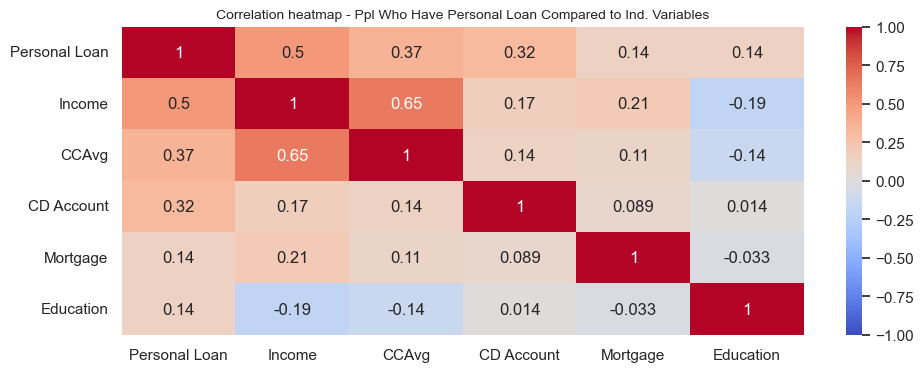

In [179]:
plt.figure(figsize=(11,4))
sns.heatmap(bank_loan_modelling[['Personal Loan','Income', 'CCAvg', 'CD Account', 'Mortgage', 'Education']].corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap - Ppl Who Have Personal Loan Compared to Ind. Variables',
          fontsize=10)
plt.show()

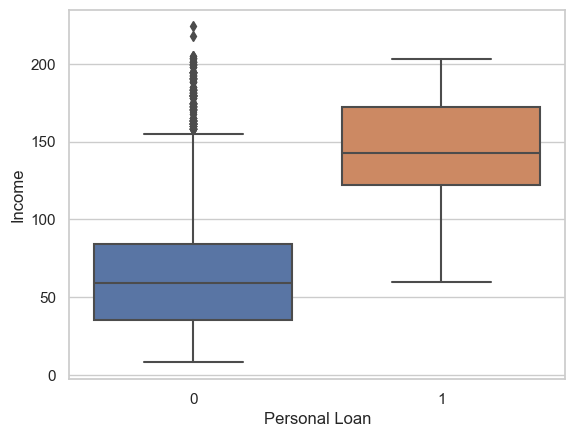

In [180]:
sns.boxplot(x="Personal Loan", y="Income", data=bank_loan_modelling)

# Show the plot
plt.show()

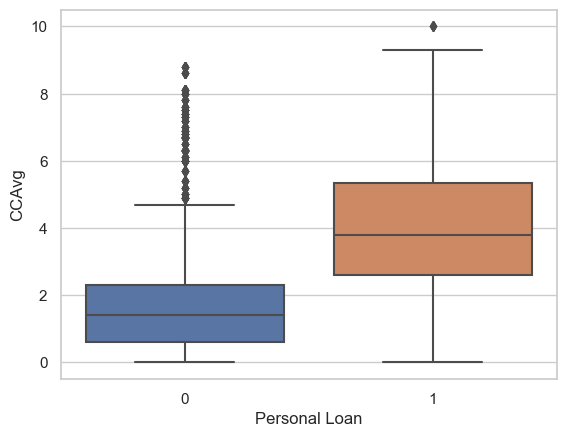

In [181]:
sns.boxplot(x="Personal Loan", y="CCAvg", data=bank_loan_modelling)

# Show the plot
plt.show()

<Axes: xlabel='Personal Loan', ylabel='Education'>

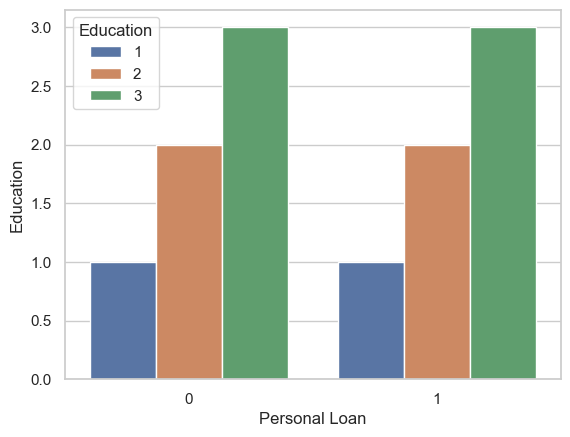

In [185]:
sns.barplot(bank_loan_modelling, x="Personal Loan", y="Education", hue="Education")

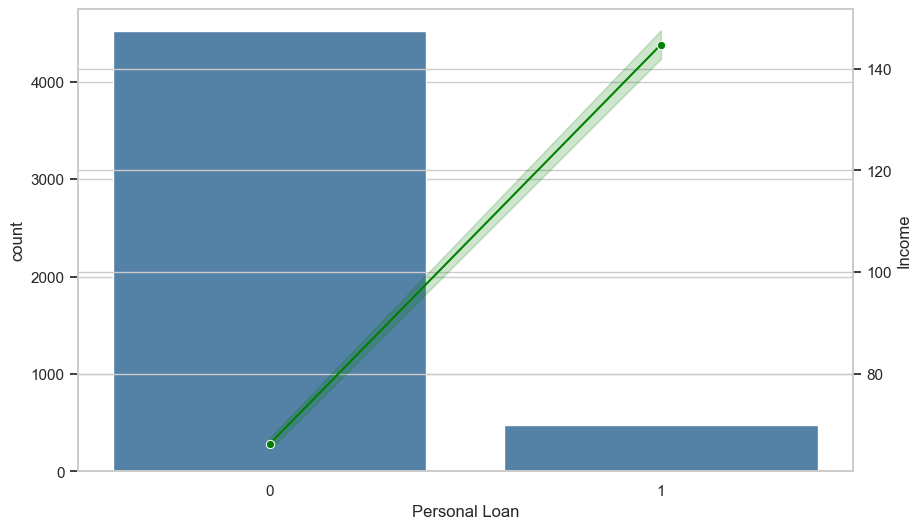

In [186]:
sns.set(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for count
sns.countplot(x="Personal Loan", data=bank_loan_modelling, ax=ax1, color='steelblue')

# Line plot for average value
ax2 = ax1.twinx()
sns.lineplot(x="Personal Loan", y="Income", data=bank_loan_modelling, ax=ax2, color='green', marker='o')

# Show the p
plt.show()

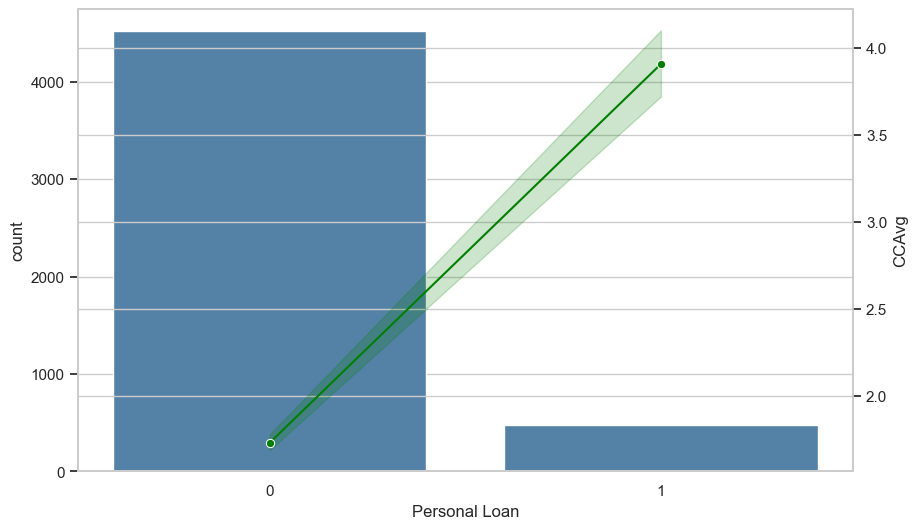

In [187]:
sns.set(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for count
sns.countplot(x="Personal Loan", data=bank_loan_modelling, ax=ax1, color='steelblue')

# Line plot for average value
ax2 = ax1.twinx()
sns.lineplot(x="Personal Loan", y="CCAvg", data=bank_loan_modelling, ax=ax2, color='green', marker='o')

# Show the plot
plt.show()

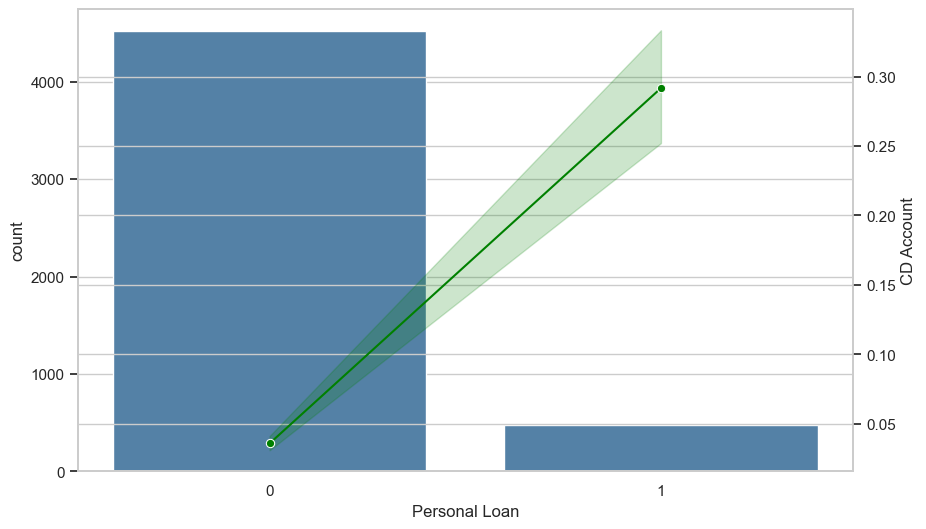

In [188]:
sns.set(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for count
sns.countplot(x="Personal Loan", data=bank_loan_modelling, ax=ax1, color='steelblue')

# Line plot for average value
ax2 = ax1.twinx()
sns.lineplot(x="Personal Loan", y="CD Account", data=bank_loan_modelling, ax=ax2, color='green', marker='o')

# Show the plot
plt.show()

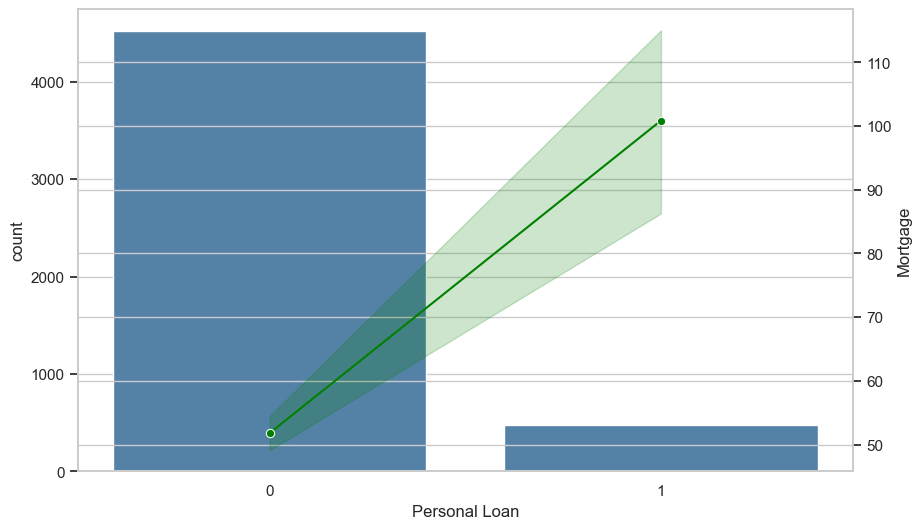

In [189]:
sns.set(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for count
sns.countplot(x="Personal Loan", data=bank_loan_modelling, ax=ax1, color='steelblue')

# Line plot for average value
ax2 = ax1.twinx()
sns.lineplot(x="Personal Loan", y="Mortgage", data=bank_loan_modelling, ax=ax2, color='green', marker='o')

# Show the plot
plt.show()

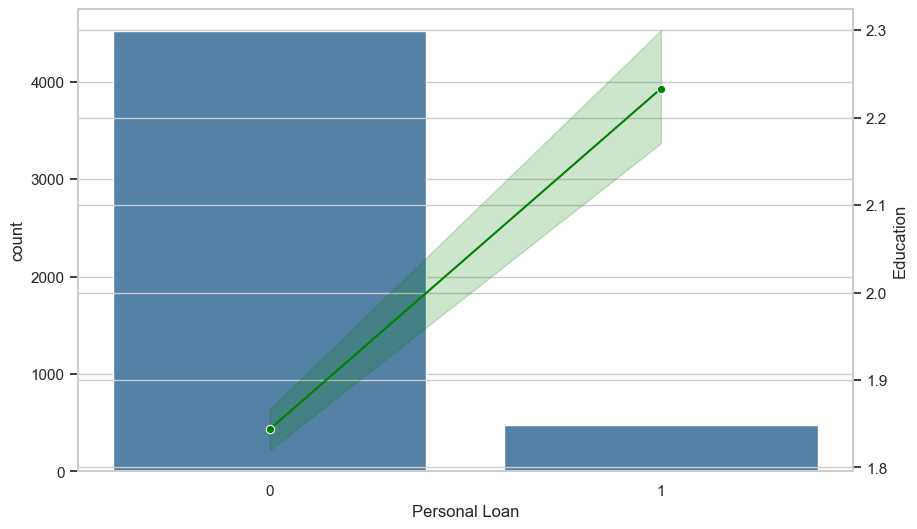

In [190]:
sns.set(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for count
sns.countplot(x="Personal Loan", data=bank_loan_modelling, ax=ax1, color='steelblue')

# Line plot for average value
ax2 = ax1.twinx()
sns.lineplot(x="Personal Loan", y="Education", data=bank_loan_modelling, ax=ax2, color='green', marker='o')

# Show the plot
plt.show()

In [191]:
#implimenting random forest 

In [200]:
select_columns = ['Income', 'CCAvg', 'CD Account', 'Mortgage', 'Education']
X = bank_loan_modelling[select_columns] 
target = 'Personal Loan'
Y = bank_loan_modelling[target]

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

In [202]:
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns 
categorical_features = X.select_dtypes(include=['object']).columns 

In [203]:
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numeric_features)]), 'cat', categorical_features

In [204]:
clf = RandomForestRegressor(max_depth=2, random_state=0)

In [205]:
clf.fit(X, y)

RandomForestRegressor(max_depth=2, random_state=0)

In [209]:
y_pred = clf.predict(X_test).round()

In [210]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[891,   4],
       [ 26,  79]], dtype=int64)

In [211]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.97


In [222]:
nb = GaussianNB()
nb.fit(X_train, y_train)
predicted_probas = nb.predict_proba(X_test)

In [223]:
y_prob = nb.predict_proba(X_test)[:, 1]

In [224]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

In [225]:
cumulative_perc= np.linspace(0, 1, len(tpr))

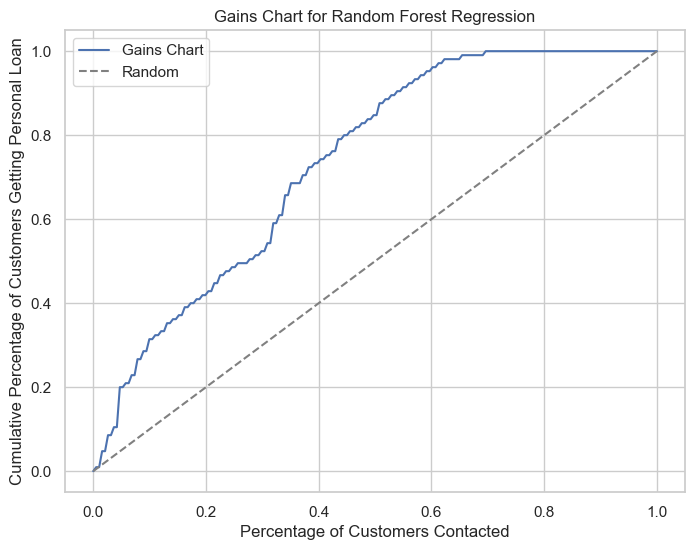

In [229]:
plt.figure(figsize=(8, 6))
plt.plot(cumulative_perc, tpr, label='Gains Chart')
plt.plot(cumulative_perc, cumulative_perc, label='Random', linestyle='--', color='gray')
plt.xlabel('Percentage of Customers Contacted')
plt.ylabel('Cumulative Percentage of Customers Getting Personal Loan')
plt.title('Gains Chart for Random Forest Regression')
plt.legend()
plt.show()

In [230]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       895
           1       0.95      0.75      0.84       105

    accuracy                           0.97      1000
   macro avg       0.96      0.87      0.91      1000
weighted avg       0.97      0.97      0.97      1000

